In [3]:
import numpy as np
import matplotlib.pyplot as plt

Testing rendering speed with different SIMD sets and different MM_PACKS

SSE (128 bit SIMD)

In [4]:
MM_PACKS = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [21]:
NO_OPT_ERR = 0.5
INTRIN_ERR = 0.05
def getBoostError(NO_OPT, OPT):
    return NO_OPT/OPT * np.sqrt(np.square(NO_OPT_ERR/NO_OPT) + np.square(INTRIN_ERR / OPT))

In [7]:
XMM_NO_OPT = np.array([253, 249.6, 252.9, 252.7, 249.7, 249.4, 275, 282.6])
XMM_INTRIN = np.array([65.6, 40.5, 32.6, 30.3, 27.3, 25.8, 30.81, 35.644])


In [11]:
YMM_NO_OPT = np.array([249.7, 250.0, 249.5, 283.4, 249.7, 252.8, 336.7, 286.6])
YMM_INTRIN = np.array([33.5,  21.0,  17.3,  17.8,  14.6,  13.8,  20.5,  18.3])

In [13]:
ZMM_NO_OPT = np.array([249.4, 286.6, 249.3, 282.9, 253.1, 354.3, 466.1, 282.7])
ZMM_INTRIN = np.array([20.97, 17.2,  13.6,  15.3,  13.6,  19.3,  29.3,  21.15])

[3.85670732 6.16296296 7.75766871 8.33993399 9.14652015 9.66666667
 8.92567348 7.9284031 ]
[ 7.45373134 11.9047619  14.42196532 15.92134831 17.10273973 18.31884058
 16.42439024 15.66120219]
[11.89318073 16.6627907  18.33088235 18.49019608 18.61029412 18.35751295
 15.90784983 13.36643026]
[0.00816916 0.01450195 0.01941147 0.02148731 0.02482066 0.02695432
 0.0217527  0.01790153]
[0.01861536 0.03701775 0.05072177 0.05281267 0.06784831 0.07561794
 0.04690039 0.05076921]
[0.03704957 0.05649181 0.07676883 0.06869646 0.07767218 0.05415675
 0.03206465 0.03946373]


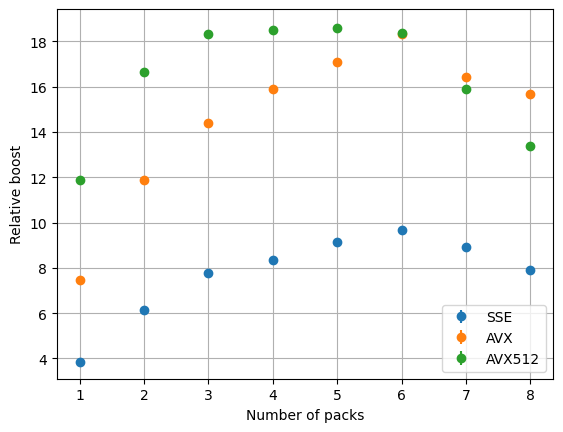

In [26]:

plt.errorbar(x =MM_PACKS, y = XMM_NO_OPT/XMM_INTRIN, 
             yerr=getBoostError(XMM_NO_OPT, XMM_INTRIN), 
             fmt='o', label='SSE')

plt.errorbar(x =MM_PACKS, y = YMM_NO_OPT/YMM_INTRIN, 
             yerr=getBoostError(YMM_NO_OPT, YMM_INTRIN), 
             fmt='o', label='AVX')

plt.errorbar(x =MM_PACKS, y = ZMM_NO_OPT/ZMM_INTRIN, 
             yerr=getBoostError(ZMM_NO_OPT, ZMM_INTRIN), 
             fmt='o', label='AVX512')
plt.grid()
plt.xlabel('Number of packs')
plt.ylabel('Relative boost')
plt.legend()

print(XMM_NO_OPT /XMM_INTRIN)
print(YMM_NO_OPT /YMM_INTRIN)
print(ZMM_NO_OPT /ZMM_INTRIN)

print(getBoostError(XMM_NO_OPT,XMM_INTRIN))
print(getBoostError(YMM_NO_OPT,YMM_INTRIN))
print(getBoostError(ZMM_NO_OPT,ZMM_INTRIN))

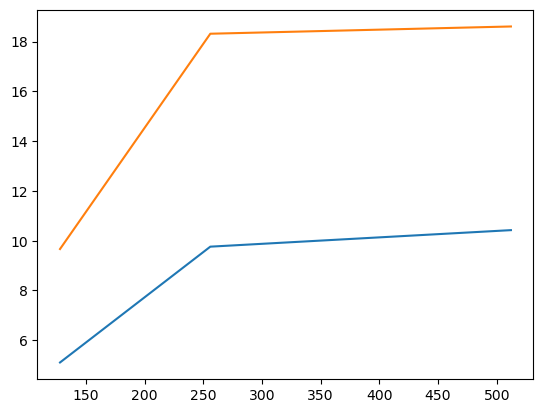

In [15]:
BEST_DOUBLE_NO_OPT = np.array([252.8, 249.9, 252.3])
BEST_DOUBLE_INTRIN = np.array([49.5, 25.6, 24.2])

BEST_FLOAT_NO_OPT = np.array([XMM_NO_OPT[5], YMM_NO_OPT[5], ZMM_NO_OPT[4]])
BEST_FLOAT_INTRIN = np.array([XMM_INTRIN[5], YMM_INTRIN[5], ZMM_INTRIN[4]])

MM_SIZE = [128, 256, 512]

plt.plot(MM_SIZE, BEST_DOUBLE_NO_OPT / BEST_DOUBLE_INTRIN)
plt.plot(MM_SIZE, BEST_FLOAT_NO_OPT / BEST_FLOAT_INTRIN)

In [16]:
AUTO_VEC_SIZE = np.array([1, 2, 4, 8, 12, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104])
AUTO_NO_OPT = np.array([249.5, 252.8, 252.5, 252.1, 249.4, 252.8, 249.6, 252.7, 249.6,  249.2, 973.1, 252.5, 1336.3, 250.4, 1720.4, 249.3,2077.8])
AUTO_VECTOR = np.array([247.3, 132.2, 90.2, 63.8,   54.0,  32.7,  18.17, 17.58, 16.288, 15.32, 53.6, 14.86, 71.55, 15.19, 92.14, 15.39, 114.2])

[ 1.00889608  1.91225416  2.79933481  3.95141066  4.61851852  7.73088685
 13.736929   14.37428896 15.32416503 16.26631854 18.15485075 16.99192463
 18.67645003 16.4845293  18.67158672 16.19883041 18.1943958 ]


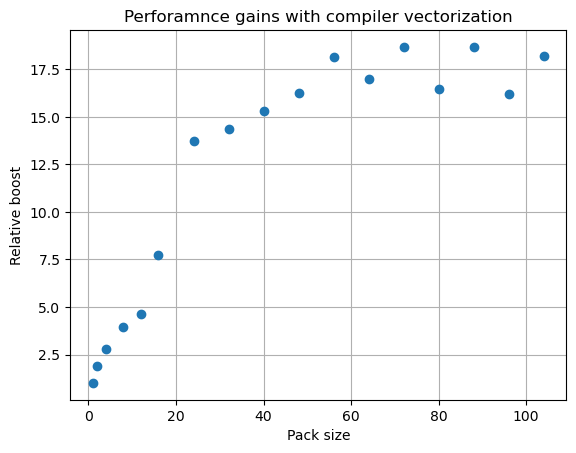

In [31]:
plt.plot(AUTO_VEC_SIZE, AUTO_NO_OPT/AUTO_VECTOR, 'o')
plt.grid()
plt.xlabel('Pack size')
plt.ylabel('Relative boost')
plt.title('Perforamnce gains with compiler vectorization')
print(AUTO_NO_OPT/AUTO_VECTOR)

[1.         1.9762901  2.90965092 3.8401084  4.7076412  5.47104247
 6.18777293 6.65258216 6.29777778 6.77990431 6.77990431 6.84541063]


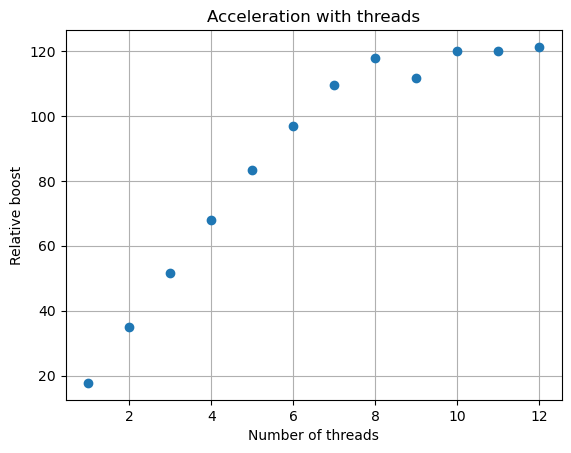

In [32]:
THREADS = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

THREADS_OPT = np.array([14.17, 7.17, 4.87, 3.69, 3.01, 2.59, 2.29, 2.13, 2.25, 2.09, 2.09, 2.07])

plt.plot(THREADS, 251.0/THREADS_OPT, 'o')
plt.grid()
plt.xlabel('Number of threads')
plt.ylabel('Relative boost')
plt.title('Acceleration with threads')
print(THREADS_OPT[0]/THREADS_OPT)